<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/DNN_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 강의에서 배운 내용을 새로운 데이터로 적용해 보자

1. 새로운 데이터 준비
2. 학습
3. 모델 저장
4. 로드해서 재활용까지

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_breast_cancer # 유방암 데이터
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# network and training
EPOCHS = 200
BATCH_SIZE = 20
VERBOSE = 1
NB_CLASSES = 1   # number of outputs = number of digits
N_HIDDEN = 128 # 은닉층 개수?
VALIDATION_SPLIT=0.2

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

In [ ]:
print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [ ]:
#build the model

DROPOUT = 0.3
RESHAPED = 30

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               3968      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 1)                 129       
                                                                 
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=20)

In [ ]:
history = model.fit(X_train, y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping])

Epoch 1/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1748 - accuracy: 0.9147 - val_loss: 0.1892 - val_accuracy: 0.9302
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9294 - val_loss: 0.1909 - val_accuracy: 0.9070
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9235 - val_loss: 0.1946 - val_accuracy: 0.9070
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9176 - val_loss: 0.1958 - val_accuracy: 0.9070
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.9265 - val_loss: 0.1967 - val_accuracy: 0.9070
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9294 - val_loss: 0.2033 - val_accuracy: 0.9302
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1856 - accuracy: 0.9324 - val_loss: 0.1834 - val_accuracy: 0.9070
Epoch 8/200
1

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9370629191398621


In [ ]:
predictions = model.predict(X_test)
print(predictions)

[[9.6078682e-01]
 [5.0077736e-03]
 [2.0788050e-06]
 [6.3629788e-01]
 [9.6032226e-01]
 [9.9559158e-01]
 [6.1492282e-01]
 [9.9993885e-01]
 [9.9542665e-01]
 [7.3741376e-02]
 [9.8999473e-05]
 [6.6886157e-01]
 [9.8395264e-01]
 [9.8615122e-01]
 [7.1161532e-01]
 [3.9427429e-02]
 [5.7972121e-01]
 [2.3681025e-06]
 [9.6037143e-01]
 [9.8935878e-01]
 [6.2738293e-24]
 [2.2634864e-03]
 [9.3921408e-20]
 [9.4616222e-01]
 [9.9441475e-01]
 [9.7713828e-01]
 [8.5776210e-01]
 [1.7993138e-24]
 [9.1928190e-01]
 [9.9828768e-01]
 [5.0956947e-01]
 [6.6954809e-01]
 [3.6471233e-01]
 [9.2942536e-01]
 [6.9727639e-06]
 [9.9979675e-01]
 [9.9051226e-07]
 [9.7176391e-01]
 [9.9500203e-01]
 [8.1096798e-01]
 [9.7783101e-01]
 [8.8930827e-01]
 [9.8401713e-01]
 [9.9570334e-01]
 [9.3624425e-01]
 [7.9471707e-01]
 [6.3108754e-01]
 [9.7104681e-01]
 [2.6106536e-02]
 [6.4031118e-01]
 [9.3630171e-01]
 [6.1382222e-01]
 [9.4726264e-01]
 [9.8028171e-01]
 [4.1881442e-01]
 [3.9869544e-12]
 [9.9973369e-01]
 [7.8399146e-01]
 [9.9319279e-0

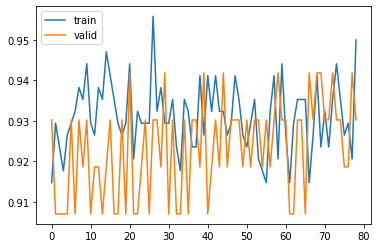

In [ ]:
# 시각화를 통하여 학습이 잘 이루어지고 있는지 확인

import matplotlib.pyplot as plt

def show_history_acc(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

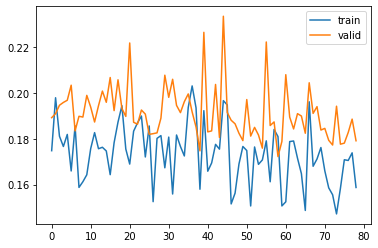

In [ ]:
# 시각화를 통하여 학습이 잘 이루어지고 있는지 확인

def show_history_loss(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.legend()
    
show_history_loss(history)

In [ ]:
file_path = "my_model_weights"
model.save_weights(file_path)

In [ ]:
model.save("my_model.h5")
model = tf.keras.models.load_model("my_model.h5")

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.9370629191398621
